##### Dataset Link : https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import keras

from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.multiclass import OneVsRestClassifier
import os
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: agg


In [ ]:
tf.__version__

'2.8.0'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import random
np.random.seed(1607094)

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Research/"

In [ ]:
# !unrar e "/content/drive/MyDrive/Thesis_Data_CSE4000/dataset.rar"

In [ ]:
# load dataset
data=pd.read_csv(path+"data.csv",sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')
label=pd.read_csv(path+"labels.csv",sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')

In [ ]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [ ]:
feature_cols=len(data.columns)

In [ ]:
data.shape

(801, 20532)

In [ ]:
#check any value is null
data.isna().any()

Unnamed: 0    False
gene_0        False
gene_1        False
gene_2        False
gene_3        False
              ...  
gene_20526    False
gene_20527    False
gene_20528    False
gene_20529    False
gene_20530    False
Length: 20532, dtype: bool

In [ ]:
#Checking for duplicates and removing them
data.drop_duplicates(inplace = True)
data.shape

(801, 20532)

In [ ]:
label.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [ ]:
label.describe()

,Unnamed: 0,Class
count,801,801
unique,801,5
top,sample_0,BRCA
freq,1,300


In [ ]:
data["Unnamed: 0"]

0        sample_0
1        sample_1
2        sample_2
3        sample_3
4        sample_4
          ...    
796    sample_796
797    sample_797
798    sample_798
799    sample_799
800    sample_800
Name: Unnamed: 0, Length: 801, dtype: object

In [ ]:
label['Unnamed: 0']

0        sample_0
1        sample_1
2        sample_2
3        sample_3
4        sample_4
          ...    
796    sample_796
797    sample_797
798    sample_798
799    sample_799
800    sample_800
Name: Unnamed: 0, Length: 801, dtype: object

In [ ]:
class_labels=label["Class"]
class_labels

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

In [ ]:
print(class_labels.unique())
print(class_labels.value_counts())

['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64


In [ ]:
print("Class: ",len(class_labels.unique()))

Class:  5


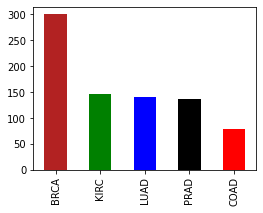

In [ ]:
class_labels.value_counts().plot(kind='bar',color=['firebrick', 'green', 'blue', 'black', 'red'], figsize=(4,3))

In [ ]:
label = label.replace({'PRAD': 0})
label = label.replace({'LUAD': 1})
label = label.replace({'BRCA': 2})
label = label.replace({'KIRC': 3})
label = label.replace({'COAD': 4})

In [ ]:
label.head()

,Unnamed: 0,Class
0,sample_0,0
1,sample_1,1
2,sample_2,0
3,sample_3,0
4,sample_4,2


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
X=data.iloc[:,1:]
y=label.iloc[:,1:]

In [ ]:
X.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
X.shape

(801, 20531)

In [ ]:
y.shape

(801, 1)

In [ ]:
y

,Class
0,0
1,1
2,0
3,0
4,2
...,...
796,2
797,1
798,4
799,0


In [ ]:
class_labels.shape

(801,)

In [ ]:
dataset=pd.concat([X, class_labels], axis=1)

In [ ]:
dataset = dataset.set_index('Class').sort_index()

In [ ]:
dataset.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.0,3.801873,5.025591,6.404150,9.564754,0.0,9.997688,1.025241,0.0,0.0,...,5.919628,8.507347,9.849333,8.184360,9.796564,11.607552,10.456272,9.949412,5.980037,0.000000
BRCA,0.0,3.277330,2.629846,6.000487,9.627027,0.0,8.375748,1.029559,0.0,0.0,...,6.152192,9.015499,10.244994,5.172335,9.788066,11.582057,11.098776,9.909158,5.494595,0.000000
BRCA,0.0,1.149975,0.462576,5.861427,10.092440,0.0,5.445833,1.045932,0.0,0.0,...,6.494526,9.549727,10.037602,6.636375,9.459339,10.109922,10.442394,9.574616,3.541862,0.000000
BRCA,0.0,4.538159,3.955722,6.259862,9.103243,0.0,6.918327,1.162726,0.0,0.0,...,7.102994,9.813018,10.629311,7.128757,10.409104,11.195225,11.169593,10.513451,6.729131,0.270828
BRCA,0.0,2.599770,2.562792,7.365491,10.462155,0.0,7.922370,0.000000,0.0,0.0,...,5.036873,8.267555,9.630254,5.531385,9.241642,11.459872,10.045882,9.091528,9.356654,0.000000


In [ ]:
dataset.shape

(801, 20531)

In [ ]:
dataset.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20531)

In [ ]:
len(dataset.columns)

20531

In [ ]:
dt=dataset

In [ ]:
missing=[]
for i in range(len(dataset.columns)):
    if((dt['gene_'+str(i)]==0).all()):
        missing.append(i)

In [ ]:
print(len(missing))

267


In [ ]:
for i in range(len(missing)):
    print(missing[i],end=' ')

5 23 4370 4808 4809 4814 4816 4817 4831 5288 7661 7662 7663 7664 7665 8121 9304 9306 9314 9316 9320 9452 10121 11958 13991 14158 14159 14161 15138 15140 15141 15446 16566 16568 16569 16571 16575 16578 16579 16604 16634 16637 16677 16697 16698 16699 16700 16701 16702 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737 16738 16739 16740 16741 16742 16743 16744 16745 16746 16748 16749 16750 16751 16752 16753 16754 16756 16757 16758 16759 16760 16761 16762 16763 16764 16765 16766 16767 16768 16769 16770 16771 16772 16774 16775 16776 16777 16778 16779 16780 16781 16782 16783 16785 16787 16788 16789 16790 16791 16792 16794 16795 16796 16798 16799 16800 16801 16802 16803 16804 16805 16806 16807 16808 16809 16810 16811 16812 16813 16816 16818 16819 16820 16821 16822 16823 16824 16826 16827 16830 16831 16832 16833 16834 16835 16836 16837 16838 1

In [ ]:
for i in range(len(missing)):
    X=X.drop(['gene_'+str(missing[i])], axis = 1)

In [ ]:
X.shape

(801, 20264)

In [ ]:
X.head(3)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0


In [ ]:
X=pd.DataFrame(X).to_numpy()
y=pd.DataFrame(y).to_numpy()

In [ ]:
target=y

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(target)
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_encoded = onehot_encoder.fit_transform(integer_encoded)

In [ ]:
target_encoded[0]

array([1., 0., 0., 0., 0.])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,target_encoded,test_size=0.20,random_state=42,shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train[[0]]

array([[-0.18260929,  1.90922841,  0.55666368, ...,  2.56930826,
        -0.08594483, -0.26295175]])

In [ ]:
X_train[[0]].shape

(1, 20264)

In [ ]:
y_train[[0]]

array([[0., 0., 1., 0., 0.]])

In [ ]:
y_train[[0]].argmax(axis=1)

array([2])

In [ ]:
savePath='/content/drive/MyDrive/Thesis_Data_CSE4000/model/'

## Create a ANN Model

In [ ]:
# Implement callback function to stop training
# when accuracy reaches ACCURACY_THRESHOLD
ACCURACY_THRESHOLD = 0.9998
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('accuracy') >= ACCURACY_THRESHOLD) :
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
def ann_model():
    current_features=20264
    optimizer = tf.keras.optimizers.Adam(0.00001)
    model =tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(current_features,)))
    model.add(tf.keras.layers.Dense(16,activation='relu'))
    model.add(tf.keras.layers.Dense(32,activation='relu'))
    model.add(tf.keras.layers.Dense(5,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
model_ann = ann_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 162120    
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 162,973
Trainable params: 162,973
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_ann = model_ann.fit(X_train,y_train,epochs=100,batch_size=8,validation_split=0.2,callbacks=[callbacks])

Epoch 1/100
64/64 [==============================] - 1s 7ms/step - loss: 1.4559 - accuracy: 0.3574 - val_loss: 1.2522 - val_accuracy: 0.6250
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 1.1434 - accuracy: 0.7012 - val_loss: 0.9834 - val_accuracy: 0.7891
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.9290 - accuracy: 0.7715 - val_loss: 0.8080 - val_accuracy: 0.8125
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.7827 - accuracy: 0.7871 - val_loss: 0.6902 - val_accuracy: 0.8125
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 0.6778 - accuracy: 0.7891 - val_loss: 0.6052 - val_accuracy: 0.8203
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 0.5974 - accuracy: 0.8008 - val_loss: 0.5372 - val_accuracy: 0.8281
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 0.5319 - accuracy: 0.8125 - val_loss: 0.4849 - val_accuracy: 0.8281
Epoch 8/100
6

In [ ]:
def plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(len(acc))
    plt.figure(figsize=(7,7))
    plt.plot(epochs,acc,'b')
    plt.plot(epochs,val_acc,'r')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.savefig(path+'modelAcc.png')
    plt.legend(['Train', 'Val'], loc='upper left')


    plt.figure(figsize=(7,7))
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs,loss,'b')
    plt.plot(epochs,val_loss,'r')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.savefig(path+'modelLoss.png')
    plt.legend(['Train', 'Val'], loc='upper right')

    plt.show()

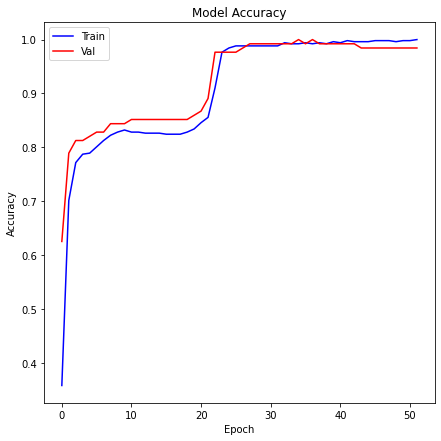

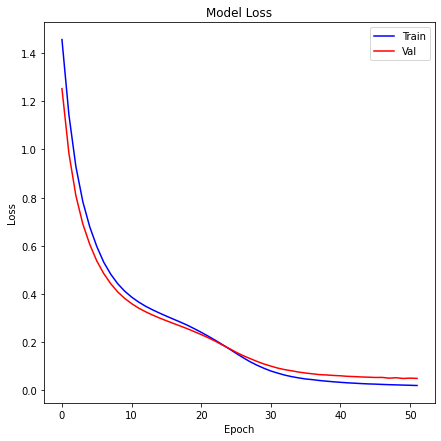

In [ ]:
plot(history_ann)

In [ ]:
model_ann.save(savePath+'test_model.h5')

In [ ]:
!ls '/content/drive/MyDrive/Thesis_Data_CSE4000/model'

ann_model.h5


In [ ]:
## load model
from keras.models import load_model
model_ann_load = load_model(savePath+'test_model.h5')

### Model evaluation

In [ ]:
score=model_ann.evaluate(X_test,y_test)
ann_acc=score[1]*100
print("%s: %.2f%%" % (model_ann.metrics_names[1], ann_acc))

6/6 [==============================] - 1s 11ms/step - loss: 0.0300 - accuracy: 0.9876
accuracy: 98.76%


In [ ]:
#Making the confusing Matrix
y_pred=model_ann.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_ann=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion matrix: ",cm_ann)

Confusion matrix:  [[29  0  0  0  0]
 [ 0 27  0  0  2]
 [ 0  0 61  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 17]]


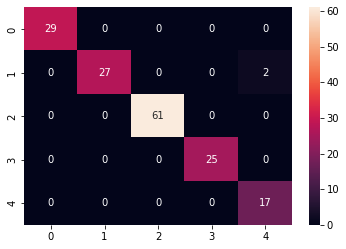

In [ ]:
sns.heatmap(cm_ann,annot=True)
plt.savefig(savePath+'ANN_CM.png')

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cmAnn_df = pd.DataFrame(cm_ann,index = ['PRAD', 'LUAD' ,'BRCA' ,'KIRC' ,'COAD'], columns = ['PRAD', 'LUAD', 'BRCA' ,'KIRC' ,'COAD'])

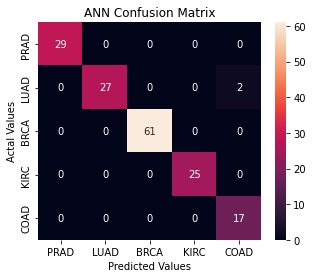

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cmAnn_df, annot=True)
plt.savefig(path+'annh.png')
plt.title('ANN Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
ann_metrics = metrics.classification_report( y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('ANN',ann_metrics)

ANN               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.93      0.96        29
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        25
           4       0.89      1.00      0.94        17

    accuracy                           0.99       161
   macro avg       0.98      0.99      0.98       161
weighted avg       0.99      0.99      0.99       161



#### Testing on Data

In [ ]:
X_test.shape

(161, 20264)

In [ ]:
X_test[[0]].shape

(1, 20264)

In [ ]:
for i in range(X_test.shape[0]):
  y_pred1=model_ann.predict(X_test[[i]])
  print(y_pred1.argmax(axis=1)[0],end=' ')

1 2 1 3 2 2 2 4 0 1 4 2 1 0 3 1 1 0 2 1 1 4 3 2 2 2 4 2 0 0 2 0 0 4 2 2 1 2 1 2 4 2 2 2 3 0 3 4 2 2 0 1 3 2 3 2 3 2 4 1 1 3 0 2 0 2 1 0 3 2 2 1 2 2 2 1 0 0 3 2 3 2 2 3 1 2 2 0 4 4 4 3 2 2 2 0 1 4 4 2 2 2 2 1 2 3 2 3 2 2 0 3 0 2 1 0 2 1 1 0 3 3 2 1 1 0 2 2 1 2 2 2 0 3 4 2 0 4 0 2 2 3 0 1 0 4 3 2 0 3 2 0 2 3 3 4 0 4 1 2 4 

In [ ]:
for i in range(y_test.shape[0]):
  print(y_test[[i]].argmax(axis=1)[0],end=' ')

1 2 1 3 2 2 2 4 0 1 4 2 1 0 3 1 1 0 2 1 1 4 3 2 2 2 4 2 0 0 2 0 0 4 2 2 1 2 1 2 4 2 2 2 3 0 3 4 2 2 0 1 3 2 3 2 3 2 1 1 1 3 0 2 0 2 1 0 3 2 2 1 2 2 2 1 0 0 3 2 3 2 2 3 1 2 2 0 4 4 4 3 2 2 2 0 1 4 4 2 2 2 2 1 2 3 2 3 2 2 0 3 0 2 1 0 2 1 1 0 3 3 2 1 1 0 2 2 1 2 2 2 0 3 4 2 0 1 0 2 2 3 0 1 0 4 3 2 0 3 2 0 2 3 3 4 0 4 1 2 4 

In [ ]:
for i in range(X_test.shape[0]):
  y_pred1=model_ann.predict(X_test[[i]])
  val1=y_pred1.argmax(axis=1)[0]
  val2=y_test[[i]].argmax(axis=1)[0]
  if(val1!=val2):
    print("no")
  # print(y_pred1.argmax(axis=1)[0],end=' ')

no
no


In [ ]:
y_test[[0]].argmax(axis=1)

array([1])

## SVM

In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC

In [ ]:
X_trn,X_tst,y_trn,y_tst=train_test_split(X,y,test_size=0.20,random_state=42,shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_trn=sc.fit_transform(X_trn)
X_tst=sc.transform(X_tst)

In [ ]:
#training the classifier using X_Train and y_train
svm_model = SVC(C= 1.2, kernel='rbf', gamma='scale')
svm_model.fit(X_trn, y_trn)

# check the accuracy on the training set
print("train score: ",svm_model.score(X_trn, y_trn))
print("test Score : ",svm_model.score(X_tst, y_tst))

train score:  1.0
test Score :  0.9937888198757764


In [ ]:
#Making the confusing Matrix
y_pred=svm_model.predict(X_tst)
cm_svm=confusion_matrix(y_tst, y_pred)
print("Confusion matrix: ",cm_svm)

Confusion matrix:  [[28  0  1  0  0]
 [ 0 29  0  0  0]
 [ 0  0 61  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 17]]


In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cmSvm_df = pd.DataFrame(cm_svm,index = ['PRAD', 'LUAD' ,'BRCA' ,'KIRC' ,'COAD'], columns = ['PRAD', 'LUAD', 'BRCA' ,'KIRC' ,'COAD'])

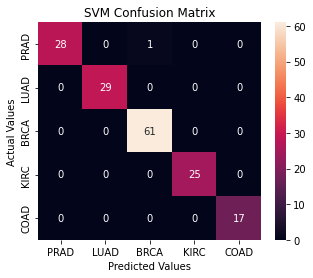

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cmSvm_df, annot=True)
plt.savefig(savePath+'svm_CM.png')
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
svm_metrics = metrics.classification_report( y_tst, y_pred)
print('SVM: ',svm_metrics)

SVM:                precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       1.00      1.00      1.00        29
           2       0.98      1.00      0.99        61
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        17

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161




## KNN __ with albow method

In [ ]:
error = []
# Calculating error for K values between 1 and 40
neighbour=5
min_val=99999
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # pred_i=pred_i.reshape(18,1)
    temp=np.mean(pred_i != y_test)
    # if(min_val>temp):
    #     min_val=temp
    #     neighbour=i
    error.append(temp)
    print(temp)

0.0
0.002484472049689441
0.002484472049689441
0.004968944099378882
0.002484472049689441
0.004968944099378882
0.004968944099378882
0.0037267080745341614
0.002484472049689441
0.0037267080745341614
0.002484472049689441
0.0037267080745341614
0.0037267080745341614
0.002484472049689441
0.002484472049689441
0.002484472049689441
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.002484472049689441
0.0012422360248447205
0.002484472049689441
0.0012422360248447205
0.0012422360248447205
0.0012422360248447205
0.002484472049689441
0.002484472049689441
0.0037267080745341614
0.002484472049689441
0.002484472049689441
0.0012422360248447205
0.0012422360248447205
0.0012422360248447205


Text(0, 0.5, 'Mean Error')

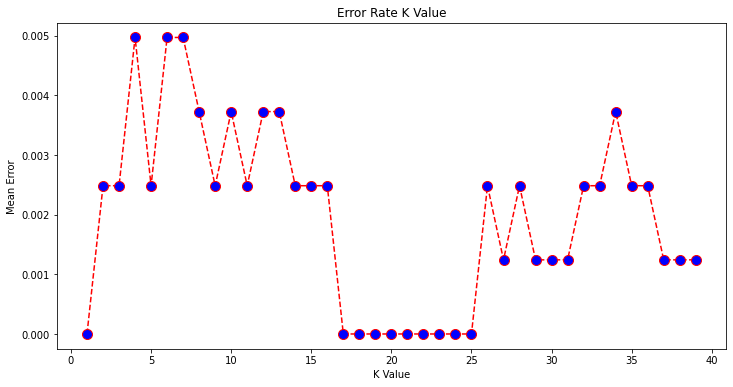

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=20)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = KNN.predict(X_test)
y_pred[[0]].argmax(axis=1)[0]

1

In [ ]:
#Accuray of the model
KNN_acc =metrics.accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print("Accuracy on KNN: %.2f" % (KNN_acc*100),"%")
cm_knn=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("KNN Confusion Metrics:\n",cm_knn)

Accuracy on KNN: 100.00 %
KNN Confusion Metrics:
 [[29  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 61  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 17]]


In [ ]:
knn_metrics = metrics.classification_report( y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('KNN: ',knn_metrics)

KNN:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        17

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



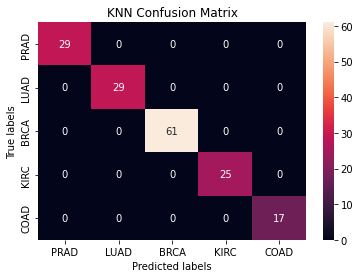

In [ ]:
import seaborn as sns

T5_lables = ['PRAD', 'LUAD' ,'BRCA' ,'KIRC' ,'COAD']

ax= plt.subplot()

cm_knn = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm_knn, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.savefig(savePath+'KNN_CM.png')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('KNN Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

## Decision Tree Classification

In [ ]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier(criterion='entropy')
# Train Decision Tree Classifer
DT = DT.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = DT.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy on DT: %.2f" % (accuracy_score(y_test, y_pred)*100),"%")

Accuracy on DT: 96.89 %


In [ ]:
#Making the confusing Matrix
from sklearn.metrics import confusion_matrix
cm_DT=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("DT Confusion matrix: ",cm_DT)

DT Confusion matrix:  [[58  0  0  2  1]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 2  0  0  0 27]]


In [ ]:
DT_metrics = metrics.classification_report( y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('DT: ',DT_metrics)

DT:                precision    recall  f1-score   support

           0       0.97      0.95      0.96        61
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       0.94      1.00      0.97        29
           4       0.96      0.93      0.95        29

    accuracy                           0.97       161
   macro avg       0.97      0.98      0.97       161
weighted avg       0.97      0.97      0.97       161



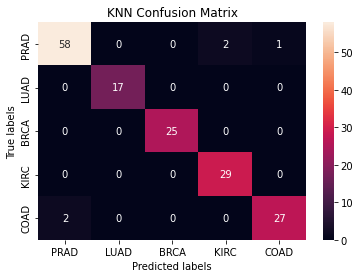

In [ ]:
import seaborn as sns

T5_lables = ['PRAD', 'LUAD' ,'BRCA' ,'KIRC' ,'COAD']

ax= plt.subplot()

cm_knn = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm_knn, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.savefig(savePath+'DT_CM.png')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('KNN Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
dataset.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20531)

In [ ]:
dt.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6', 'gene_7',
       'gene_8', 'gene_9', 'gene_10',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20264)

int

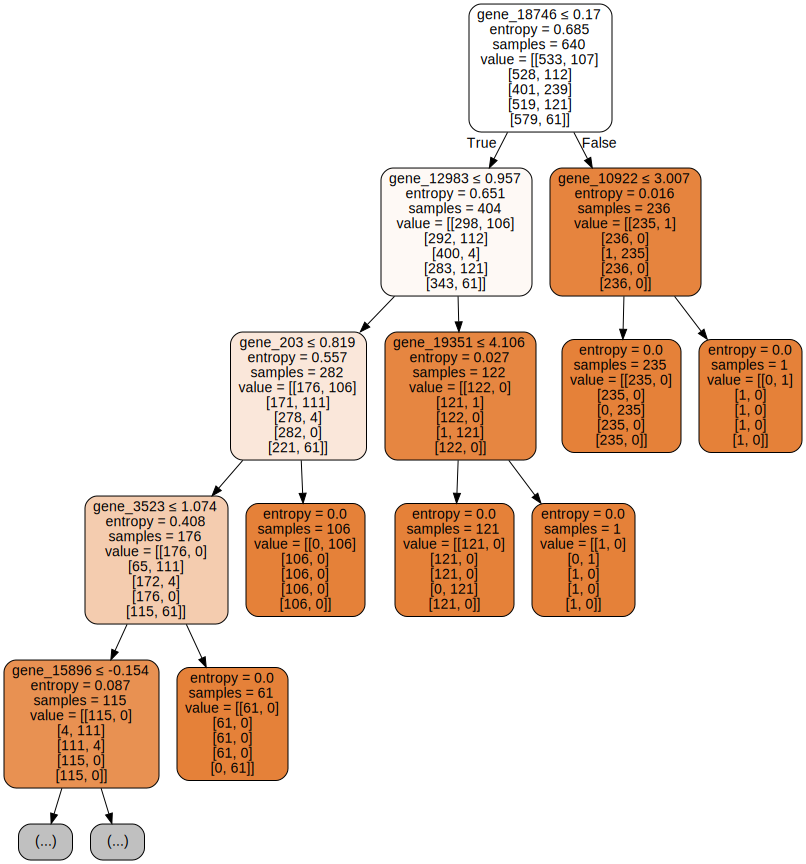

In [ ]:
import graphviz
dot_data = tree.export_graphviz(DT, out_file=None,
                      max_depth = 4,
                      feature_names=dt.columns,
                      class_names= ['PRAD', 'LUAD', 'BRCA' ,'KIRC' ,'COAD'],
                      filled=True, rounded=True,
                      special_characters=True,)
graph = graphviz.Source(dot_data)
graph

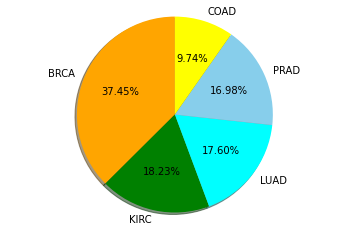

In [ ]:
import matplotlib.pyplot as plt
data = {'BRCA':300,
        'KIRC':146,
        'LUAD':141,
        'PRAD':136,
        'COAD':78}
colors = ['orange', 'green', 'cyan', 'skyblue', 'yellow']
highlight =(0,0,0,0,0)
plt.pie(list(data.values()), explode=highlight, labels=data.keys(), colors=colors, autopct='%2.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

##### Plot the data